# **Industry Employment and Skills**

**Firstly, we need to import all the necessary library to do the data analysis and visualization of the dataset. The most commonly used libraries in Python are pandas, numpy, searborn, wordcloud, matplotlib and many more. The later three libraries are for visualization.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)
from wordcloud import WordCloud, STOPWORDS

**Next, we need to import all the dataset needed to be analyzed. Also, the dataset are commonly in csv or excel file type. We can read the dataset according the their file type and store it in the dataframe; df. Since we have 3 different datasets, we can use different df name to avoid confusion later on. In this project, we simply use numbers to differentiate them.**

In [ ]:
df1 = pd.read_csv (r'/content/linkedin_to_isic_rev_4_industry_mapping_0.csv') #dataset 1
df2 = pd.read_csv (r'/content/public_use-industry-employment-growth.csv') #dataset 2
df3 = pd.read_csv (r'/content/public_use-industry-skills-needs.csv') #dataset 3

**Below is to see how the dataframe looks like, we can choose to see only the first few rows of them. We run only for df1 but we can always change the df accordingly, anytime.**

In [ ]:
df1.head(5)

,isic_section,isic_section_name,isic_division,isic_division_name,industry_sk,industry_name,Industry_group_sk,Industry_group_name
0,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",63,farming,1,Agriculture
1,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",64,ranching,1,Agriculture
2,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",65,dairy,1,Agriculture
3,A,A. Agriculture; forestry and fishing,3,Fishing and aquaculture,66,fishery,1,Agriculture
4,B,B. Mining and quarrying,5,Mining of coal and lignite,56,mining & metals,16,Energy and Mining


**Then, we can check the datatype for each column in the dataframe.**

> Indented block



In [ ]:
df1.dtypes

isic_section           object
isic_section_name      object
isic_division           int64
isic_division_name     object
industry_sk             int64
industry_name          object
Industry_group_sk       int64
Industry_group_name    object
dtype: object

**To check wether there is any null value in every columns:**

In [ ]:
df1.isnull().sum()

isic_section           0
isic_section_name      0
isic_division          0
isic_division_name     0
industry_sk            0
industry_name          0
Industry_group_sk      0
Industry_group_name    0
dtype: int64

**Also, we see the number of rows each columns have to known if there are any missing values. From result below, there is no column having missing values as all have 148 rows. If in the case there is any missing values, we can drop the rows/columns (depending on the suitability)**

In [ ]:
df1.count()

isic_section           148
isic_section_name      148
isic_division          148
isic_division_name     148
industry_sk            148
industry_name          148
Industry_group_sk      148
Industry_group_name    148
dtype: int64

**Reaching to the first question we want to find answer from df1, which industry has the highest number and in contrast which has the lowest? To get the answer, we visualize it by using bar graph; Number in Each Industry againsts Industry.**

**The result is as below:**

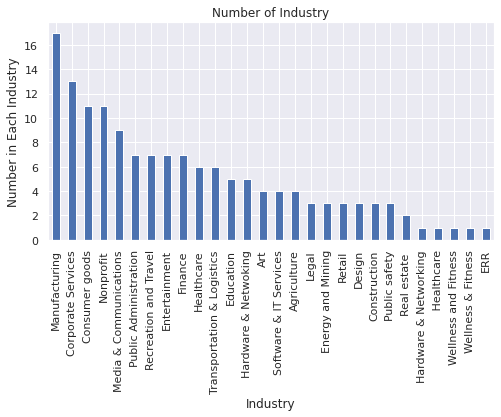

In [ ]:
df1.Industry_group_name.value_counts().nlargest(30).plot(kind='bar', figsize=(8,4))
plt.title('Number of Industry')
plt.ylabel('Number in Each Industry')
plt.xlabel('Industry');

**For example, we want to check the number in each particular industry we can just straighly do the summation. For example, the total summation in Manufacturing is 17**

In [ ]:
df1.isin(['Manufacturing']).sum(axis=0)

isic_section            0
isic_section_name       0
isic_division           0
isic_division_name      0
industry_sk             0
industry_name           0
Industry_group_sk       0
Industry_group_name    17
dtype: int64

**On the other hand, the above question can also be answered by just counting the values of each column but that would not be as nice as visualizing it in a graph/chart. Visualizing using a picture can help more people to understand them better.**

In [ ]:
df1['Industry_group_name'].value_counts()

Manufacturing                 17
Corporate Services            13
Consumer goods                11
Nonprofit                     11
Media & Communications         9
Public Administration          7
Recreation and Travel          7
Entertainment                  7
Finance                        7
Healthcare                     6
Transportation & Logistics     6
Education                      5
Hardware & Netwoking           5
Agriculture                    4
Software & IT Services         4
Art                            4
Legal                          3
Energy and Mining              3
Retail                         3
Design                         3
Construction                   3
Public safety                  3
Real estate                    2
Hardware & Networking          1
 Healthcare                    1
Wellness and Fitness           1
Wellness & Fitness             1
ERR                            1
Name: Industry_group_name, dtype: int64

**Below is to see how few lines of df2 looks like:**

In [ ]:
df2.head(3)

,country_code,country_name,wb_region,wb_income,isic_section_index,isic_section_name,industry_id,industry_name,growth_rate_2015,growth_rate_2016,growth_rate_2017,growth_rate_2018,growth_rate_2019
0,ae,United Arab Emirates,Middle East & North Africa,High income,B,Mining and quarrying,56.0,Mining & Metals,7.80%,5.85%,4.34%,1.00%,-0.06%
1,ae,United Arab Emirates,Middle East & North Africa,High income,B,Mining and quarrying,57.0,Oil & Energy,3.30%,1.35%,1.75%,1.85%,2.26%
2,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,15.0,Pharmaceuticals,17.14%,13.70%,9.06%,4.81%,2.84%


**Then, we can check the datatype for each column in the dataframe.**

In [ ]:
df2.dtypes

country_code           object
country_name           object
wb_region              object
wb_income              object
isic_section_index     object
isic_section_name      object
industry_id           float64
industry_name          object
growth_rate_2015       object
growth_rate_2016       object
growth_rate_2017       object
growth_rate_2018       object
growth_rate_2019       object
dtype: object

**To check wether there is any null value in every columns:**

In [ ]:
df2.isnull().sum()

country_code          6809
country_name          6809
wb_region             6809
wb_income             6809
isic_section_index    6809
isic_section_name     6809
industry_id           6809
industry_name         6809
growth_rate_2015      6809
growth_rate_2016      6809
growth_rate_2017      6809
growth_rate_2018      6809
growth_rate_2019      6809
dtype: int64

**In this part,  the question is how the world bank regions are related to their income. As a result, we can see that Europe & Central Asia has the most count of highest world bank income(blue color line) followed by upper middle income(yellow line) and lastly the lowest count is the lowest middle income(orange line).**

**The same thing can be seen for all regions on how they relates to the world bank income.**

In [ ]:
import plotly.express as px
age_att=df2.groupby(['wb_region','wb_income']).apply(lambda x:x['industry_name'].count()).reset_index(name='Counts')
px.line(age_att,x='wb_region',y='Counts',color='wb_income',title='World Bank Income in Different Region')

**Visualize how the divison of income in all regions.**

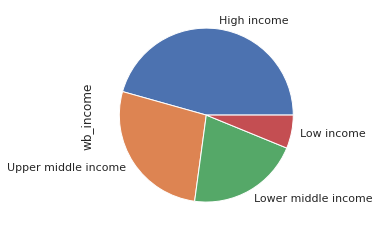

In [ ]:
#df2.wb_income.value_counts(normalize=True)
df2.wb_income.value_counts(normalize=True).plot.pie()
plt.show()

**Below is to see how few lines of df3 looks like:**

In [ ]:
df3.head(3)

,year,isic_section_index,isic_section_name,industry_name,skill_group_category,skill_group_name,skill_group_rank
0,2015.0,B,Mining and quarrying,Mining & Metals,Specialized Industry Skills,Mining,1.0
1,2015.0,B,Mining and quarrying,Mining & Metals,Soft Skills,Negotiation,2.0
2,2015.0,B,Mining and quarrying,Mining & Metals,Business Skills,Project Management,3.0


**Then, we can check the datatype for each column in the dataframe.**

In [ ]:
df3.dtypes

year                    float64
isic_section_index       object
isic_section_name        object
industry_name            object
skill_group_category     object
skill_group_name         object
skill_group_rank        float64
dtype: object

**To check wether there is any null value in every columns:**

In [ ]:
df3.isnull().sum()

year                    1580
isic_section_index      1580
isic_section_name       1580
industry_name           1580
skill_group_category    1580
skill_group_name        1580
skill_group_rank        1580
dtype: int64

**In this dataset, one of question we can ask is from 2015 to 2019, there are many skill groups added to LinkedIn but in those periods what are the most group of skills required?**

**Result: In that period, some of the most required group skills are Digital Literacy, Business Management, Leadership, Social Media, Communication, and Teamwork.**

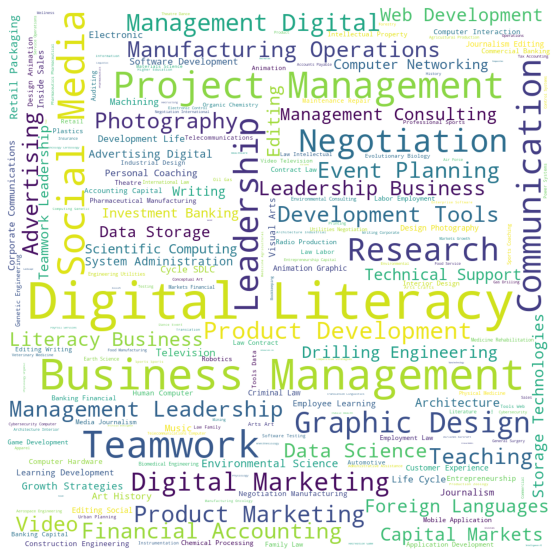

In [ ]:
wc = WordCloud(background_color="white", max_words=1000, 
               stopwords=STOPWORDS,width=1000,height=1000)
wc.generate(" ".join(df3['skill_group_name'].dropna()))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

**Next question, which industry section has the biggest distribution?**

**Result: Professional scientific and technical activities have the biggest distribution with 31% overall over other industries. Assumption: with this analysis, some students can opt to study in that industry as it offers a lot of position.**

In [ ]:
plt.figure(figsize=[8,8])
src=df3.SurveyEase_name.value_counts()
plt.pie(src,labels=src.index,startangle=90,counterclock=False,colors=['#FFC0CB','#FFFF00'],wedgeprops={'width':0.4},autopct='%1.0f%%', pctdistance=0.75);

NameError: ignored

<Figure size 576x576 with 0 Axes>